In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random
# from tensorflow.keras import set_random_seed
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


: 

In [ ]:
from google.colab import files
files.upload()

Saving emotion_text.csv to emotion_text.csv


{'emotion_text.csv': b',text,label\n0,"[ On days when I feel close to my partner and other friends.  \xc3\xa1\r\nWhen I feel at peace with myself and also experience a close \xc3\xa1\r\ncontact with people whom I regard greatly.]",joy\n1,"Every time I imagine that someone I love or I could contact a \xc3\xa1\r\nserious illness\t even death.",fear\n2,"When I had been obviously unjustly treated and had no possibility \xc3\xa1\r\nof elucidating this.",anger\n3,"When I think about the short time that we live and relate it to \xc3\xa1\r\nthe periods of my life when I think that I did not use this \xc3\xa1\r\nshort time.",sadness\n4,"At a gathering I found myself involuntarily sitting next to two \xc3\xa1\r\npeople who expressed opinions that I considered very low and \xc3\xa1\r\ndiscriminating.",disgust\n5,"When I realized that I was directing the feelings of discontent \xc3\xa1\r\nwith myself at my partner and this way was trying to put the blame \xc3\xa1\r\non him instead of sorting out m

In [ ]:
train=pd.read_csv('emotion_text.csv')

train['label']=train['label'].str.replace('shame','guilt')
train['label']=train['label'].str.replace('disgust','anger')

train.sample(5)

,Unnamed: 0,text,label
7846,194,@GrxjicTank WHY though! Why did u want to offe...,anger
136,136,The thought of having to read a boring book of...,sadness
11674,4022,What u do wen ur love cheats on u ? Wen thy do...,anger
5041,5041,The first time I really fell in love with a girl.,joy
1467,1467,During a lecture\t a colleague who did not kno...,anger


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14407 non-null  int64 
 1   text        14407 non-null  object
 2   label       14407 non-null  object
dtypes: int64(1), object(2)
memory usage: 337.8+ KB


In [ ]:
train['label'].value_counts()

anger      3805
fear       3235
joy        2629
sadness    2553
guilt      2185
Name: label, dtype: int64

**Using Naive bayes for text classification**

In [ ]:
train.shape

(14407, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['label_encoded'] = le.fit_transform(train['label'].astype(str))
train.head()

,Unnamed: 0,text,label,label_encoded
0,0,[ On days when I feel close to my partner and ...,joy,3
1,1,Every time I imagine that someone I love or I ...,fear,1
2,2,When I had been obviously unjustly treated and...,anger,0
3,3,When I think about the short time that we live...,sadness,4
4,4,At a gathering I found myself involuntarily si...,anger,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# def naive_bayes_preprocessing(df):
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(train['text'])
    # return text_counts

In [ ]:
# text_counts=naive_bayes_preprocessing(train)

In [ ]:
text_counts.shape

(14407, 19855)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, train['label_encoded'], test_size=0.2, random_state=42,stratify=train['label_encoded'])
print(f'X_train shape is {X_train.shape},y_train shape is {y_train.shape}')

X_train shape is (11525, 19855),y_train shape is (11525,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train,y_train)
naive_bayes.score(X_train,y_train)

0.8585683297180043

In [ ]:
from sklearn.metrics import accuracy_score
pred=naive_bayes.predict(X_test)
score=accuracy_score(y_test,pred)
score

0.7012491325468425

In [ ]:
text='Happiness consists more in conveniences of pleasure that occur everyday than in great pieces of good fortune that happen but seldom.”'
t1='i love you forever'

In [ ]:
# def naive_bayes_test_prep(text):
    # token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    # cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
test_text = cv.transform([text])
    # return text_counts

In [ ]:
# test_text=naive_bayes_test_prep(text)

In [ ]:
test_text.shape

(1, 19855)

['joy']


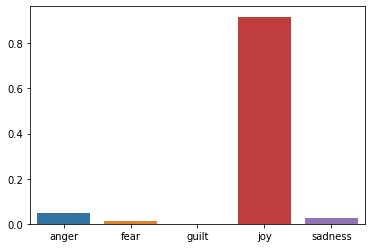

In [ ]:
prob= naive_bayes.predict_proba(test_text)
pred=naive_bayes.predict(test_text)
print(le.inverse_transform(pred))
results=pd.DataFrame(data=prob,columns=le.classes_)
import seaborn as sns
sns.barplot(data=results)
plt.show()

**Using LSTM**

In [ ]:
import nltk
nltk.download("popular")
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords # Import the stop word list
# stopwords.words("english")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
def clean_sentences(df):
    reviews = []

    for sent in (df['text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
        
        stops = set(stopwords.words("english"))                  
    # 
        # 5. Remove stop words
        meaningful_words = [w for w in words if not w in stops]
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
        reviews.append(lemma_words)

    return(reviews)

In [ ]:
train['clean_text']=clean_sentences(train)
train.head()

,Unnamed: 0,text,label,label_encoded,clean_text
0,0,[ On days when I feel close to my partner and ...,joy,3,"[day, feel, close, partner, friend, feel, peac..."
1,1,Every time I imagine that someone I love or I ...,fear,1,"[every, time, imagine, someone, love, could, c..."
2,2,When I had been obviously unjustly treated and...,anger,0,"[obviously, unjustly, treated, possibility, el..."
3,3,When I think about the short time that we live...,sadness,4,"[think, short, time, live, relate, period, lif..."
4,4,At a gathering I found myself involuntarily si...,anger,0,"[gathering, found, involuntarily, sitting, nex..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['label_encoded'] = le.fit_transform(train['label'].astype(str))
train.head()


,Unnamed: 0,text,label,label_encoded,clean_text
0,0,[ On days when I feel close to my partner and ...,joy,3,"[day, feel, close, partner, friend, feel, peac..."
1,1,Every time I imagine that someone I love or I ...,fear,1,"[every, time, imagine, someone, love, could, c..."
2,2,When I had been obviously unjustly treated and...,anger,0,"[obviously, unjustly, treated, possibility, el..."
3,3,When I think about the short time that we live...,sadness,4,"[think, short, time, live, relate, period, lif..."
4,4,At a gathering I found myself involuntarily si...,anger,0,"[gathering, found, involuntarily, sitting, nex..."


In [ ]:
from tensorflow.keras.utils import to_categorical
target=train.label_encoded.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]


In [ ]:
y_target.shape

(14407, 5)

In [ ]:
unique_words = set()
len_max = 0

for sent in (train['clean_text']):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

18086
78


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
lstm_tokenizer = Tokenizer(num_words=len(list(unique_words)))
lstm_tokenizer.fit_on_texts(list(train['clean_text']))


In [ ]:
# print(train_token[0])
# print(train_pad[0])

In [ ]:
train_token = lstm_tokenizer.texts_to_sequences(train['clean_text'])
train_pad = sequence.pad_sequences(train_token, maxlen=len_max)
print(train_pad.shape)

(14407, 78)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_lstm,X_test_lstm,y_train_lstm,y_test_lstm=train_test_split(train_pad,y_target,test_size=0.2,random_state=42,stratify=y_target)
print(f'X_train_lstm shape is {X_train_lstm.shape}, y_test_lstm shape is {y_test_lstm.shape}')

X_train_lstm shape is (11525, 78), y_test_lstm shape is (2882, 5)


In [ ]:
y_train_lstm.shape

(11525, 5)

In [ ]:

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_accuracy', patience = 2)
callback = [early_stopping]

In [ ]:
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add((LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
# model.add(Bidirectional(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
model.add((LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False)))
#model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 300)           5425800   
                                                                 
 lstm (LSTM)                 (None, 78, 128)           219648    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 5,701,861
Trainable params: 5,701,861
Non-

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train_lstm, y_train_lstm, validation_data=(X_test_lstm, y_test_lstm),epochs=4, batch_size=512, verbose=1, callbacks=callback)


Epoch 1/4
23/23 [==============================] - 36s 1s/step - loss: 1.4152 - accuracy: 0.3925 - val_loss: 0.9716 - val_accuracy: 0.6249
Epoch 2/4
23/23 [==============================] - 28s 1s/step - loss: 0.6677 - accuracy: 0.7745 - val_loss: 0.7994 - val_accuracy: 0.7144
Epoch 3/4
23/23 [==============================] - 28s 1s/step - loss: 0.4023 - accuracy: 0.8721 - val_loss: 0.9683 - val_accuracy: 0.7137
Epoch 4/4
23/23 [==============================] - 28s 1s/step - loss: 0.2845 - accuracy: 0.9082 - val_loss: 1.0812 - val_accuracy: 0.6947


In [ ]:
lstm_acc=history.history['val_accuracy'][-1]

Text(0.5, 1.0, 'val accuracy')

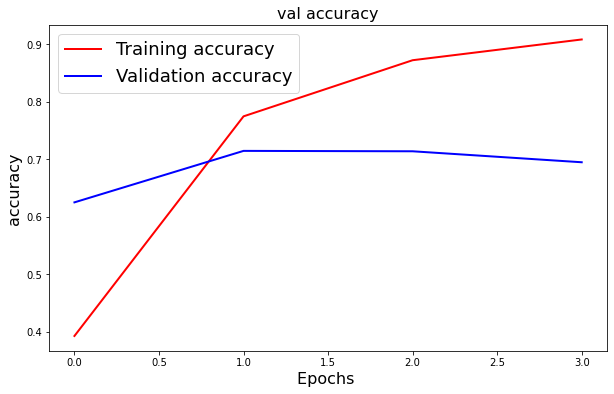

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:

text1='How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##'
text2='Close to the end of a revision...taking this story I love in a new direction has been exhilarating for me. #endlesspossibilities #amwriting'
text3='Incredibly shocked and disappointed with @united customer service. Really making me rethink flying with them in the future. #unhappy'
text4='Has September been dull? Get #SuperSeptember from Jumia Food as a new user. Order from The Place, Barcelos or Shawarma &amp; Co for 30% off'

In [ ]:
def clean_text(text):
        reviews = []

    
        
        #remove html content
        review_text = BeautifulSoup(text).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
        
        stops = set(stopwords.words("english"))                  
    # 
        # 5. Remove stop words
        meaningful_words = [w for w in words if not w in stops]
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
        reviews.append(lemma_words)

        return(reviews)

In [ ]:
print(text)

Happiness consists more in conveniences of pleasure that occur everyday than in great pieces of good fortune that happen but seldom.”


In [ ]:
t='i love you forever'

In [ ]:
text_clean=clean_text(t)
# lstm_tokenizer.fit_on_texts(list(text_clean))
test_token = lstm_tokenizer.texts_to_sequences(text_clean)
test_pad = sequence.pad_sequences(test_token, maxlen=len_max)
test_pad.shape

(1, 78)

In [ ]:
test_pad

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   30,
        1021]], dtype=int32)

[[0.07118202 0.10230787 0.04289909 0.08210704 0.70150393]]
['sadness']


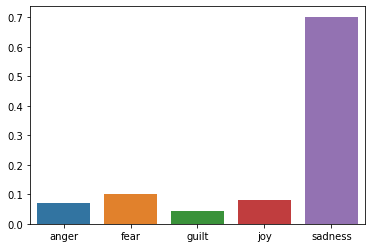

In [ ]:
pred=model.predict(test_pad)
#prob=model.predict_proba(test_pad)
#prob=pred[:5]
print(prob)
res=np.argmax(pred)
output=le.inverse_transform([res])
print(output)
# columns=['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
# columns=['anger', 'fear', 'guilt', 'joy', 'sadness']

pred_res=pd.DataFrame(data=pred,columns=le.classes_)
import seaborn as sns
ax=sns.barplot(data=pred_res)
plt.show()

In [ ]:
le.classes_

array(['anger', 'fear', 'guilt', 'joy', 'sadness'], dtype=object)

**Implementing using BERT model**

In [ ]:
from google.colab import files
files.upload()

Saving emotion_text.csv to emotion_text (1).csv


{'emotion_text.csv': b',text,label\n0,"[ On days when I feel close to my partner and other friends.  \xc3\xa1\r\nWhen I feel at peace with myself and also experience a close \xc3\xa1\r\ncontact with people whom I regard greatly.]",joy\n1,"Every time I imagine that someone I love or I could contact a \xc3\xa1\r\nserious illness\t even death.",fear\n2,"When I had been obviously unjustly treated and had no possibility \xc3\xa1\r\nof elucidating this.",anger\n3,"When I think about the short time that we live and relate it to \xc3\xa1\r\nthe periods of my life when I think that I did not use this \xc3\xa1\r\nshort time.",sadness\n4,"At a gathering I found myself involuntarily sitting next to two \xc3\xa1\r\npeople who expressed opinions that I considered very low and \xc3\xa1\r\ndiscriminating.",disgust\n5,"When I realized that I was directing the feelings of discontent \xc3\xa1\r\nwith myself at my partner and this way was trying to put the blame \xc3\xa1\r\non him instead of sorting out m

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf


In [ ]:
data=pd.read_csv('emotion_text.csv')
data=data.drop(columns=['Unnamed: 0'])
data.head()

,text,label
0,[ On days when I feel close to my partner and ...,joy
1,Every time I imagine that someone I love or I ...,fear
2,When I had been obviously unjustly treated and...,anger
3,When I think about the short time that we live...,sadness
4,At a gathering I found myself involuntarily si...,disgust


In [ ]:
# data.label.value_counts()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'].astype(str))
data.head()

,text,label,label_encoded
0,[ On days when I feel close to my partner and ...,joy,4
1,Every time I imagine that someone I love or I ...,fear,2
2,When I had been obviously unjustly treated and...,anger,0
3,When I think about the short time that we live...,sadness,5
4,At a gathering I found myself involuntarily si...,disgust,1


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label,label_encoded
0,Watching a horror film.,fear,2
1,When I applied for a job which I thought I had...,sadness,5
2,@SapientSoldier timid but determined version o...,anger,0
3,@CNN yes. Too many cops. And too many ppl who ...,sadness,5
4,Although this war will be under the guise of c...,fear,2


In [ ]:
def clean_sentences(df):
    reviews = []

    for sent in (df['text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        # words = word_tokenize(review_text.lower())
        
        stops = set(stopwords.words("english"))                  
    # 
        # 5. Remove stop words
        # meaningful_words = [w for w in words if not w in stops]
    
        #lemmatize each word to its lemma
        # lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
        reviews.append(review_text)

    return(reviews)

In [ ]:
data['clean_text']=clean_sentences(data)
data.head()

,text,label,label_encoded,clean_text
0,Watching a horror film.,fear,2,Watching a horror film
1,When I applied for a job which I thought I had...,sadness,5,When I applied for a job which I thought I had...
2,@SapientSoldier timid but determined version o...,anger,0,SapientSoldier timid but determined version o...
3,@CNN yes. Too many cops. And too many ppl who ...,sadness,5,CNN yes Too many cops And too many ppl who ...
4,Although this war will be under the guise of c...,fear,2,Although this war will be under the guise of c...


In [ ]:
train['label2']=pd.Categorical(train.label_encoded)
train.head()

,text,label,label_encoded,clean_text,label2
0,Cueing for a bus and the drivers having long d...,disgust,1,Cueing for a bus and the drivers having long d...,1
1,I tried to swindle a jeweller because my watch...,shame,6,I tried to swindle a jeweller because my watch...,6
2,Once late at night (around midnight) a person ...,fear,2,Once late at night around midnight a person ...,2
3,@lennyabrahamson May I send you a copy of #Her...,joy,4,lennyabrahamson May I send you a copy of Her...,4
4,What day is it #lost,sadness,5,What day is it lost,5


In [ ]:
data.shape

(14407, 4)

In [ ]:
train=data.iloc[:11527,:]
test=data.iloc[11527:,:]
print(f'train shape is {train.shape},test shape is {test.shape}')

train shape is (11527, 4),test shape is (2880, 4)


In [ ]:
!pip install -q transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)



In [ ]:
vocabulary = tokenizer.get_vocab()

print(list(vocabulary.keys())[5000:5020])

['knight', 'lap', 'survey', 'ma', '##ow', 'noise', 'billy', '##ium', 'shooting', 'guide', 'bedroom', 'priest', 'resistance', 'motor', 'homes', 'sounded', 'giant', '##mer', '150', 'scenes']


In [ ]:
max_length_test = 20
test_sentence = 'Test tokenization sentence. Followed by another sentence'

# add special tokens

test_sentence_with_special_tokens = '[CLS]' + test_sentence + '[SEP]'

tokenized = tokenizer.tokenize(test_sentence_with_special_tokens)

print('tokenized', tokenized)

# convert tokens to ids in WordPiece
input_ids = tokenizer.convert_tokens_to_ids(tokenized)
  
# precalculation of pad length, so that we can reuse it later on
padding_length = max_length_test - len(input_ids)

# map tokens to WordPiece dictionary and add pad token for those text shorter than our max length
input_ids = input_ids + ([0] * padding_length)

# attention should focus just on sequence with non padded tokens
attention_mask = [1] * len(input_ids)

# do not focus attention on padded tokens
attention_mask = attention_mask + ([0] * padding_length)

# token types, needed for example for question answering, for our purpose we will just set 0 as we have just one sequence
token_type_ids = [0] * max_length_test

bert_input = {
    "token_ids": input_ids,
    "token_type_ids": token_type_ids,
    "attention_mask": attention_mask
}
print(bert_input)

tokenized ['[CLS]', 'test', 'token', '##ization', 'sentence', '.', 'followed', 'by', 'another', 'sentence', '[SEP]']
{'token_ids': [101, 3231, 19204, 3989, 6251, 1012, 2628, 2011, 2178, 6251, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:

bert_input = tokenizer.encode_plus(
                        test_sentence,                      
                        add_special_tokens = True, # add [CLS], [SEP]
                        max_length = max_length_test, # max length of the text that can go to BERT
                        pad_to_max_length = True, # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

print('encoded', bert_input)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


encoded {'input_ids': [101, 3231, 19204, 3989, 6251, 1012, 2628, 2011, 2178, 6251, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
# can be up to 512 for BERT
max_length = 512
batch_size = 6

In [ ]:
def convert_example_to_feature(review):
  
  # combine step for tokenization, WordPiece vector mapping, adding special tokens as well as truncating reviews longer than the max length
  
  return tokenizer.encode_plus(review, 
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
bert_tokenizer=convert_example_to_feature(data['text'][0])
print(bert_tokenizer)
len(bert_tokenizer)

{'input_ids': [101, 3666, 1037, 5469, 2143, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3

In [ ]:
# map to the expected input to TFBertForSequenceClassification, see here 
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(df):

  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  # label_list=list(df['label_encoded'])
  for label in df['label_encoded']:
    label_list.append([label])

  # if (limit > 0):
      # ds = ds.take(limit)
    
  for review in df['clean_text']:

    bert_input = convert_example_to_feature(review)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    # label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [ ]:
# train dataset
# ds_train_encoded = encode_examples(ds_train).shuffle(10000).batch(batch_size)
train_encoded = encode_examples(train)
train_encoded=train_encoded.batch(batch_size)
# test dataset
# test_encoded = encode_examples(test)
# test_encoded= test_encoded.batch(batch_size)
# test_encoded
train_encoded

<BatchDataset shapes: ({input_ids: (None, 512), token_type_ids: (None, 512), attention_mask: (None, 512)}, (None, 1)), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [ ]:
test_encoded = encode_examples(test)
test_encoded= test_encoded.batch(batch_size)
test_encoded

<BatchDataset shapes: ({input_ids: (None, 512), token_type_ids: (None, 512), attention_mask: (None, 512)}, (None, 1)), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [ ]:
test_encoded.shard

<bound method DatasetV2.shard of <BatchDataset shapes: ({input_ids: (None, 512), token_type_ids: (None, 512), attention_mask: (None, 512)}, (None, 1)), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>>

In [ ]:
from transformers import TFBertForSequenceClassification,BertConfig
import tensorflow as tf

# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5

# we will do just 1 epoch for illustration, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1


# model initialization
# config = BertConfig.from_pretrained('bert-base-uncased',num_labels=7)
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=7)


  
# bert_model = BertModel.from_pretrained('bert-base-uncased', config=config)

# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.summary()


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  5383      
                                                                 
Total params: 109,487,623
Trainable params: 109,487,623
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bert_history = bert_model.fit(train_encoded, epochs=1, validation_data=test_encoded)

 664/1922 [=========>....................] - ETA: 28:43 - loss: 1.2706 - accuracy: 0.5324

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = bert_model.evaluate(test_encoded)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

480/480 [==============================] - 67s 139ms/step - loss: 0.6533 - accuracy: 0.7663
Loss: 0.6532856822013855
Accuracy: 0.7663194537162781


In [ ]:
bert_acc=bert_history.history['val_accuracy'][0]

   Naive_bayes      LSTM      BERT
0     0.647814  0.650937  0.766319


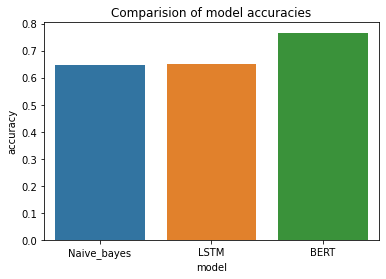

In [ ]:
res={'Naive_bayes':[score],'LSTM':[lstm_acc],'BERT':[bert_acc]}
# accuracies=[score,lstm_acc,bert_acc]
results=pd.DataFrame(data=res)
print(results.head())
sns.barplot(data=results)
plt.title('Comparision of model accuracies')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.show()

**Custom text testing**

In [ ]:
text='Happiness consists more in conveniences of pleasure that occur everyday than in great pieces of good fortune that happen but seldom.”' # enter text
text2='On days when I feel close to my partner and other friends. When I feel at peace with myself and also experience a close contact with people whom I regard greatly' 
text3='When I realized that I was directing the feelings of discontent with myself at my partner and this way was trying to put the blame on him instead of sorting out my own feeliings.'
text4='When I think about the short time that we live and relate it to the periods of my life when I think that I did not use this short time.'
text5='I feel guilty when when I realize that I consider material things more important than caring for my relatives.  I feel very self-centered.'
text6='At a gathering I found myself involuntarily sitting next to two people who expressed opinions that I considered very low and discriminating.'
text7='When I heard on the radio that the football match in Belgium had ended in a catastrophe	 and several people had died.  I could not understand how normal people could behave in such a way.'

['anger']


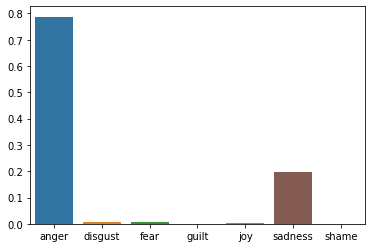

In [ ]:
text1= cv.transform([text7])
prob= naive_bayes.predict_proba(text1)
pred=naive_bayes.predict(text1)
print(le.inverse_transform(pred))
results=pd.DataFrame(data=prob,columns=le.classes_)
import seaborn as sns
sns.barplot(data=results)
plt.show()

**Miscellaneous**

In [ ]:
'''
def map_example_to_dict(input_ids, attention_masks, token_type_ids):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }

def encode_examples_test(text):

  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  # label_list = []
  # label_list=list(df['label_encoded'])
  # for label in df['label_encoded']:
    # label_list.append([label])

  # if (limit > 0):
      # ds = ds.take(limit)
    
  # for review in df['clean_text']:

  bert_input = convert_example_to_feature(text)
  
  input_ids_list.append(bert_input['input_ids'])
  token_type_ids_list.append(bert_input['token_type_ids'])
  attention_mask_list.append(bert_input['attention_mask'])
    # label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list)).map(map_example_to_dict)
  '''


'\ndef map_example_to_dict(input_ids, attention_masks, token_type_ids):\n  return {\n      "input_ids": input_ids,\n      "token_type_ids": token_type_ids,\n      "attention_mask": attention_masks,\n  }\n\ndef encode_examples_test(text):\n\n  # prepare list, so that we can build up final TensorFlow dataset from slices.\n  input_ids_list = []\n  token_type_ids_list = []\n  attention_mask_list = []\n  # label_list = []\n  # label_list=list(df[\'label_encoded\'])\n  # for label in df[\'label_encoded\']:\n    # label_list.append([label])\n\n  # if (limit > 0):\n      # ds = ds.take(limit)\n    \n  # for review in df[\'clean_text\']:\n\n  bert_input = convert_example_to_feature(text)\n  \n  input_ids_list.append(bert_input[\'input_ids\'])\n  token_type_ids_list.append(bert_input[\'token_type_ids\'])\n  attention_mask_list.append(bert_input[\'attention_mask\'])\n    # label_list.append([label])\n\n  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_id

In [ ]:
# bert_test=encode_examples_test(text)
# bert_test

In [ ]:
# pred=bert_model.predict(bert_test)
# pred

In [ ]:
# pred.logits

In [ ]:
# tf_prediction = tf.nn.softmax(pred.logits, axis=1).numpy()[0]
# tf_prediction

In [ ]:
# np.argmax(tf_prediction)